In [50]:
import time
import pandas as pd
from tqdm import tqdm
from selenium import webdriver
from urllib.parse import quote
from bs4 import BeautifulSoup
from selenium.webdriver.common.by import By
import warnings
warnings.filterwarnings('ignore')

In [36]:
base_url = 'https://kin.naver.com/search/list.naver'
url = f'{base_url}?query={quote("여친 선물")}&page={1}'
driver = webdriver.Chrome('C:/Users/YONSAI/Downloads/chromedriver.exe')
driver.get(url)

In [37]:
soup = BeautifulSoup(driver.page_source, 'html.parser')

In [38]:
lis = soup.select('ul.basic1 > li')
len(lis)

10

In [39]:
li = lis[0]

In [40]:
sub_url = li.select_one('a._searchListTitleAnchor')['href']
driver.get(sub_url)
time.sleep(2)

In [51]:
answer_list = []
for i in tqdm(range(1, 11)):
    driver.get(f'{base_url}?query={quote("여친 선물")}&page={i}')
    time.sleep(2)
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    lis = soup.select('ul.basic1 > li')

    for li in lis:
        sub_url = li.select_one('a._searchListTitleAnchor')['href']
        driver.get(sub_url)
        time.sleep(2)

        count = int(driver.find_element(By.CSS_SELECTOR, '._answerCount.num').text)
        click_count = (count - 1) // 5

        for i in range(click_count):
            driver.find_element(By.ID, 'nextPageButton').click()
            time.sleep(1)

        soup = BeautifulSoup(driver.page_source, 'html.parser')
        divs = soup.select('.answer-content__item._contentWrap._answer')

        for div in divs:
            ps = div.select('p.se-text-paragraph')
            paragraph = ''
            for p in ps:
                text = p.get_text()
                if text == ' ' or text == '\u200b':
                    continue
                paragraph += text + '\n'
            answer_list.append(paragraph)
        
        driver.back()
        time.sleep(2)

100%|██████████| 10/10 [11:51<00:00, 71.20s/it]


In [67]:
pd.DataFrame(answer_list)

,0
0,여친선물로\n데일리로맨틱 오르골 무드등 강추요\n여친선물 BEST입니다~^^ 후기봐...
1,먼저 여친의 생일을 축하합니다!\n20대 초반 여친 생일선물 추천드립니다.\n20대...
2,인기있는 여친선물 리스트 말고\n뭔가 특별한 선물이어야 하지 않을까요?\n정성스런 ...
3,"20대 초반 여자친구 선물로\n사랑 문답, 펜디 카드지갑, 꽃다발 추천드려요!!\n..."
4,여자친구 선물 고민중이시면 목걸이 완전 추천해요!\n오랫동안 간직할수도 있고 여자친...
...,...
679,대학로 연극 티켓 추천드릴게요\n여자친구의 선물을 고르는 일은 항상 설레면서\n다른...
680,노미네이션 팔찌 한번 검색해 보세요\n의미를 담아서 메시지를 넣은 팔찌를 구성할수 ...
681,안녕하세요!\n저도 여자친구나 지인들한테 선물을 많이 하는 편이라 글 써봅니다!\n...
682,https://blog.naver.com/tkdghks7/221782360113\n...


In [68]:
gifts = ' '.join(answer_list)
gifts

'여친선물로\n데일리로맨틱 오르골 무드등 강추요\n여친선물 BEST입니다~^^ 후기봐보세요\n 먼저 여친의 생일을 축하합니다!\n20대 초반 여친 생일선물 추천드립니다.\n20대 여성분들 많이 꾸미는 시기이기에 향수, 립스틱, 의류, 목걸이 등이 좋을 것 같구요.\n선물의 끝은 "감동"이므로 손편지와 작은 꽃다발 함께 하면 더 좋을 것 같습니다. \n다시 한 번 축하합니다. :)\n 인기있는 여친선물 리스트 말고\n뭔가 특별한 선물이어야 하지 않을까요?\n정성스런 손편지가 1번입니다.\n손편지를 써서 드리셔야 다른 선물이 빛을 발할수 있습니다~\n그리고\n나없을때도 내생각하라는 말과 함께\n대형인형 추천드려요~\n껴안고 잘 수도 있고, 침실인테리어로도 쓸수있고요~\n마지막으로\n이건 좀더 사랑을 담아 고백하는 의미로\n드릴때 쓰는거긴 한데\n사귄지 얼마 안되셨으면 써도 좋고\n기념일에 사용하셔도 좋습니다~\n 20대 초반 여자친구 선물로\n사랑 문답, 펜디 카드지갑, 꽃다발 추천드려요!!\n카드지갑이랑 꽃다발 주면서\n사랑 문답까지 작성해서 같이 선물로 주면\n여자친구분 감동 받습니다\n한번 참고라도 해보시고 결정해 보세여\nhttps://link.coupang.com/a/Vhl2F\nhttps://link.coupang.com/a/Vhl6O\nhttps://link.coupang.com/a/Vhme2\n파트너스 활동의 일환으로 이에 따른 일정액의 수수료를 받을 수 있습니다.\n 여자친구 선물 고민중이시면 목걸이 완전 추천해요!\n오랫동안 간직할수도 있고 여자친구가 직접 끼고 다닐수도 있으니까 더 특별한 선물이될거예요! \nhttps://smartstore.naver.com/fossette43/products/5792689156\nhttps://smartstore.naver.com/fossette43/products/6593602515\nhttps://smartstore.naver.com/fossette43/products/7339358460\n 안녕하세요! 

In [69]:
import re, nltk
from konlpy.tag import Okt
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [70]:
okt = Okt()
tokens = okt.nouns(gifts)
tokens[:10]

['여친', '선물', '데', '일리', '로맨틱', '골', '무드등', '강추', '여친', '선물']

In [71]:
len(tokens)

13971

In [72]:
new_tokens = []
for token in tokens:
    item = re.sub('[A-Za-z0-9]', '', token)
    if item:
        new_tokens.append(item)

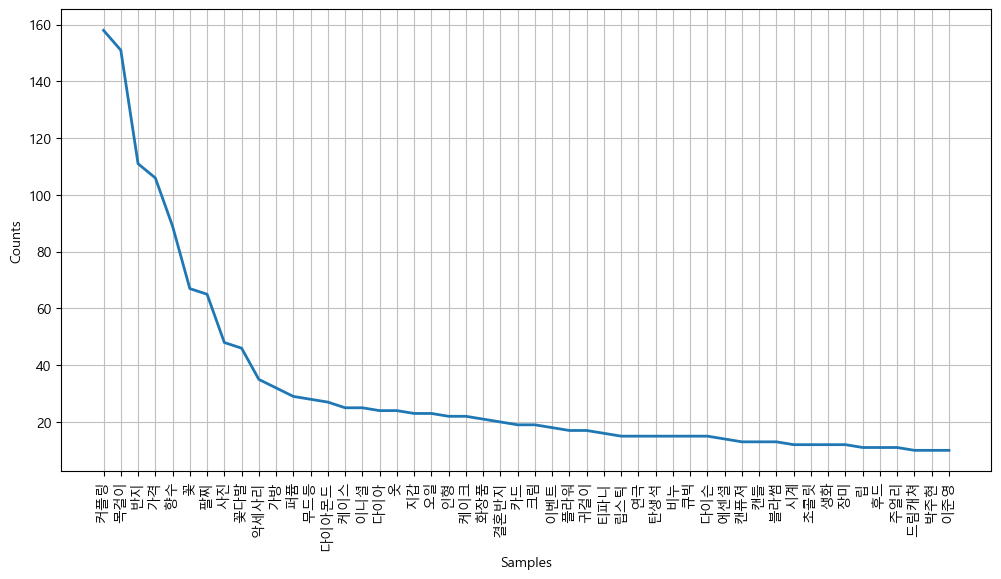

In [118]:
gift = nltk.Text(new_tokens, name='여친선물')
plt.figure(figsize=(12,6))
gift.plot(50);

In [117]:
stoptext = """
    선물 여친 추천 여자친구 사랑 생일 축하 초반 것 감동 더 번 때 수도 문답 데 일리 로맨틱 골
    강추 후기 먼저 여성 이기 등 끝 다시 인기 리스트 뭔가 다른 빛 발 나 생각 말 대형 침실
    인테리어 도 마지막 이건 좀더 고백 의미 드릴 얼마 기념일 사용 펜디 작성 한번 참고 결정 파트너
    스 활동 일환 이 정액 수수료 수 고민 시 완전 간 직할 직접 끼 저 향 가능 준 제품 개 요 제공
    디자인 제 여자 상품 제작 확인 브랜드 분 구매 채택 배송 도움 하트 링크 답변 커플 거 가지 통해
    고급 마감 가성 가요 비 네이버 중 위 용 변경 세트 하나 핸드 날 정도 그냥 요즘 부담 사이트
    질문 쿠팡 남자 안쪽 은 남녀 판매 무광 처리 조금 아래 노블 정말 여기 유광 사람 주문 가장
    아이템 구성 혹시 심플 드라마 협찬 무난 할인 미만 포장 듯 순 바로 티 마음 종류 곳 로티 평이 성분
    이면 기부 순위 하루 지금 해 친구 평 몇개 로 템 포스팅 색상 보시 아주 끈 인터넷 글 다음 때문
    그 좀 저희 일정 제일 선호 보통 블로그 라면 소품 느낌 시간 착용 방향 고객 자 발렌타인데이 전
    문의 디 퓨저 스토어 랩 향기 복부 모두 재질 준비 경우 진짜 무료 조화 입술 선택 모양 탑 로더 데이트
    취향 에어 너 맞춤 남자친구 포인트 나이 센스 남 구경 사이즈 피부 걸 프리미엄 실버 검색 건 포
    또 효과 스타일 후원 문구 우정 싱글 단체 가족 레이져 종 열기 기분 여름 힐링 스타 정성 세상 안
    미니 케어 배 물건 뭐 더욱 모델 네 롱 보기 세공 보고 핑크 대가 달 부분 추가 실제 분위기 알
    쇼핑 사구 바로다 음날 블랙 자국
"""
stop_words = stoptext.split()
new_tokens = [word for word in new_tokens if word not in stop_words]
new_tokens[:10]

['무드등', '향수', '립스틱', '의류', '목걸이', '손편지', '꽃다발', '손편지', '손편지', '인형']

In [119]:
data = gift.vocab().most_common(5)
data

[('커플링', 158), ('목걸이', 151), ('반지', 111), ('가격', 106), ('향수', 89)]

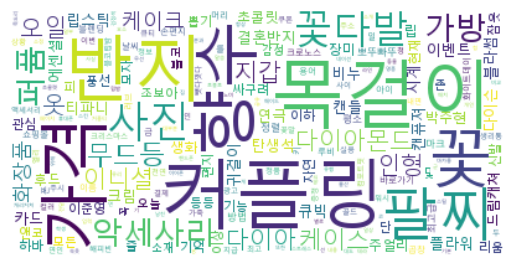

In [120]:
wc = WordCloud(
    background_color='white', random_state=2023,
    font_path='c:/Windows/Fonts/malgun.ttf', relative_scaling=0.2
).generate_from_frequencies(dict(gift.vocab().most_common(300)))

plt.imshow(wc, interpolation='bilinear')
plt.axis('off');

In [121]:
import numpy as np
from wordcloud import ImageColorGenerator
mask = np.array(Image.open('data/heart.jpg'))
image_colors = ImageColorGenerator(mask)

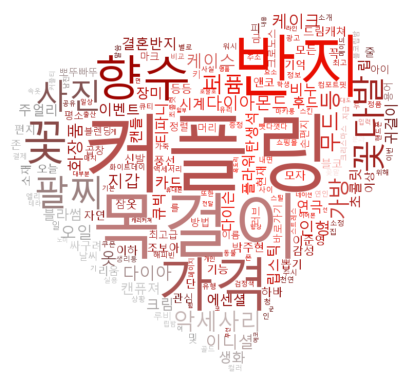

In [122]:
wc = WordCloud(
    background_color='white', random_state=2023,
    font_path='c:/Windows/Fonts/malgun.ttf',
    relative_scaling=0.2, mask=mask
).generate_from_frequencies(dict(gift.vocab().most_common(300)))

plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off');